In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/bigpro_test.csv',encoding='utf-8')
data

,Country,2018_GDP,2018_GDP_Rank,Happiness_score,Happiness_score_rank,Sub
0,Afghanistan,493.750418,151,3.632,145,-6
1,Albania,5284.380184,83,4.586,112,29
2,Algeria,4153.733978,92,5.295,84,-8
3,Angola,3289.646664,100,3.795,142,42
4,Argentina,11633.498009,52,6.388,29,-23
...,...,...,...,...,...,...
151,Venezuela,3408.000000,99,4.806,102,3
152,Vietnam,2566.596950,107,5.103,95,-12
153,Yemen,824.117629,136,3.355,152,16
154,Zambia,1516.390661,122,4.377,125,3


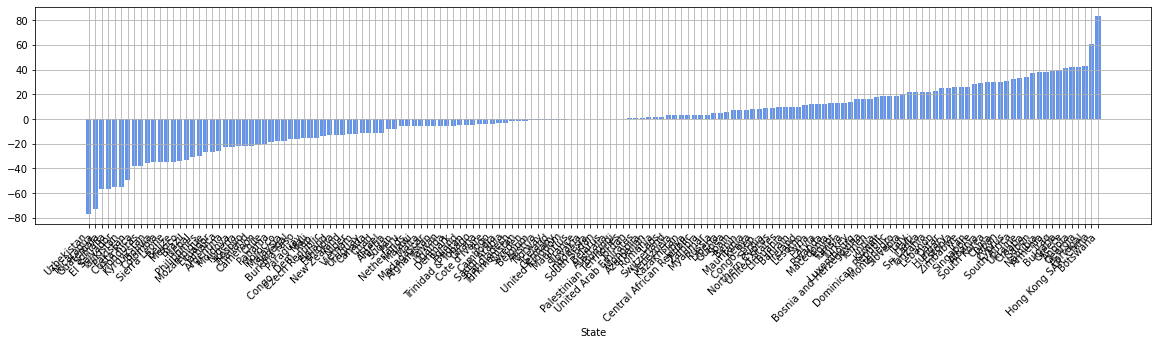

In [4]:
sub_data=data.sort_values(by='Sub')

plt.figure(figsize=(20,4))
plt.bar(sub_data['Country'],sub_data['Sub'],color='cornflowerblue')
plt.grid(True)
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.show()

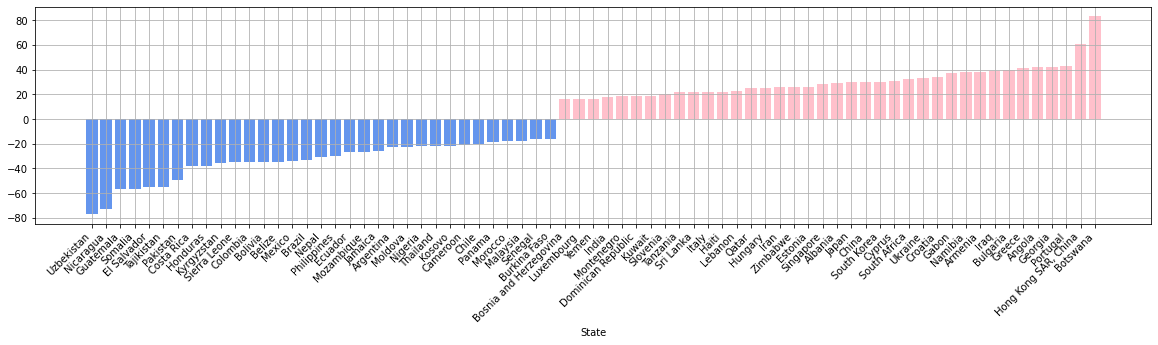

In [26]:
unhappy_data=data[data['Sub']>15]
happy_data=data[data['Sub']<-15]
unhappy_data=unhappy_data.sort_values(by='Sub')
happy_data=happy_data.sort_values(by='Sub')

plt.figure(figsize=(20,4))
plt.bar(happy_data['Country'], happy_data['Sub'],color='cornflowerblue')
plt.bar(unhappy_data['Country'], unhappy_data['Sub'],color='pink')
plt.grid(True)
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
unhappy_con=unhappy_data['Country']
happy_con=happy_data['Country']
print("unhappy ",unhappy_con)
print("happy ",happy_con)

unhappy  18                   Botswana
56       Hong Kong SAR, China
113                  Portugal
3                      Angola
48                    Georgia
51                     Greece
20                   Bulgaria
62                       Iraq
5                     Armenia
97                    Namibia
47                      Gabon
35                    Croatia
145                   Ukraine
126              South Africa
36                     Cyprus
127               South Korea
29                      China
67                      Japan
1                     Albania
122                 Singapore
61                       Iran
43                    Estonia
155                  Zimbabwe
57                    Hungary
114                     Qatar
76                    Lebanon
54                      Haiti
65                      Italy
130                 Sri Lanka
137                  Tanzania
124                  Slovenia
93                 Montenegro
72                     Kuwait
3

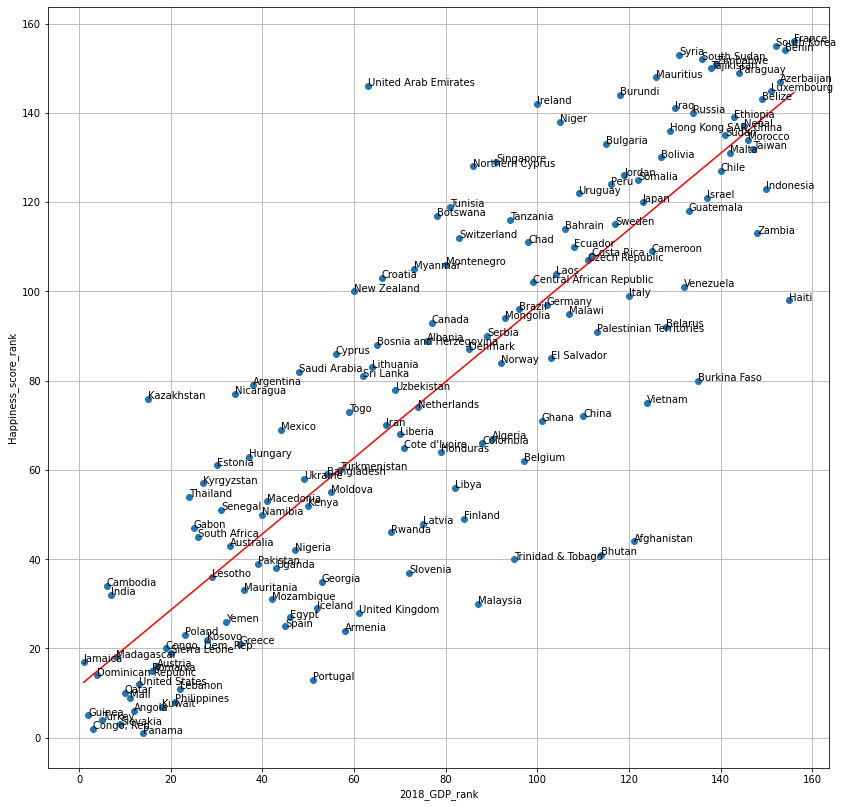

In [11]:
scatter_data=data.sort_values(by="2018_GDP_Rank")

plt.figure(figsize=(14,14))
plt.plot(scatter_data['2018_GDP_Rank'],scatter_data['Happiness_score_rank'],'o')

for i, txt in enumerate(scatter_data['Country']):
    plt.annotate(txt, (scatter_data['2018_GDP_Rank'][i], scatter_data['Happiness_score_rank'][i]))

scatter_data_linear=LinearRegression()
scatter_data_linear.fit(scatter_data['2018_GDP_Rank'].values.reshape(-1,1),scatter_data['Happiness_score_rank'])
scatter_data_prediction=scatter_data_linear.predict(scatter_data['2018_GDP_Rank'].values.reshape(-1,1))
plt.plot(scatter_data['2018_GDP_Rank'],scatter_data_linear.predict(scatter_data['2018_GDP_Rank'].values.reshape(-1,1)),color='r')

plt.xlabel('2018_GDP_rank')
plt.ylabel('Happiness_score_rank')
plt.grid(True)
plt.show()